# Analysis & Plotting of WA Experiments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
folder = './wa_exp_pmnist/'
experiment_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

In [3]:
experiment_folders

['hidden_size',
 'weighting_method',
 'learning_rate',
 'no_experiences',
 'experiences',
 'epochs',
 'hidden_layers',
 'PLOTS']

In [4]:
experiments_dict = d = dict.fromkeys(experiment_folders, 0)

In [5]:
for experiment in experiments_dict.keys():
    experiments_dict[experiment] = [name for name in os.listdir(f'{folder}{experiment}/') if os.path.isdir(os.path.join(f'{folder}{experiment}/', name))]

In [6]:
experiments_dict

{'hidden_size': ['2000', '100', '500', '1000'],
 'weighting_method': ['inverted_t', 'inverted_t_adapted', 'average'],
 'learning_rate': ['0.01', '0.005', '0.001'],
 'no_experiences': ['5'],
 'experiences': ['20', '10', '5'],
 'epochs': ['1', '10', '2', '5'],
 'hidden_layers': ['1', '10', '2', '5'],
 'PLOTS': []}

In [7]:
for key, value in experiments_dict.items():
    try:
        if experiments_dict[key][0].isdigit():
            experiments_dict[key] = list(np.sort([int(x) for x in experiments_dict[key]]))
        else:
            experiments_dict[key] = list(np.sort([float(x) for x in experiments_dict[key]]))
    except:
        pass

In [8]:
experiments_dict

{'hidden_size': [100, 500, 1000, 2000],
 'weighting_method': ['inverted_t', 'inverted_t_adapted', 'average'],
 'learning_rate': [0.001, 0.005, 0.01],
 'no_experiences': [5],
 'experiences': [5, 10, 20],
 'epochs': [1, 2, 5, 10],
 'hidden_layers': [1, 2, 5, 10],
 'PLOTS': []}

## Plot accuary per experiment/parameter

In [9]:
def plot_experiment(experiment):
    fig = plt.figure(figsize=(6, 16), constrained_layout = True)
    for index, parameter in enumerate(experiments_dict[experiment]):
            df = pd.read_csv(f'{folder}{experiment}/{parameter}/csv_log*/eval_results.csv')
            plt.subplot(len(experiments_dict[experiment]), 1, index+1)
            for eval_e in df['eval_exp'].unique():
                df_helper = df[df['eval_exp']==eval_e]
                df_helper = df_helper[df_helper['training_exp'] >= df_helper['eval_exp']]
                plt.plot(df_helper['training_exp']+1, df_helper['eval_accuracy'], label = eval_e+1)
            plt.legend()
            plt.xlabel('Training experience')
            plt.xticks(ticks = range(1,len(df['eval_exp'].unique())+1))
            plt.ylabel('Accuracy')
            plt.ylim(0,1.0)
            plt.title(f'{experiment}: {parameter}')
            plt.tight_layout

In [10]:
experiments_dict.keys()

dict_keys(['hidden_size', 'weighting_method', 'learning_rate', 'no_experiences', 'experiences', 'epochs', 'hidden_layers', 'PLOTS'])

### Hidden Size

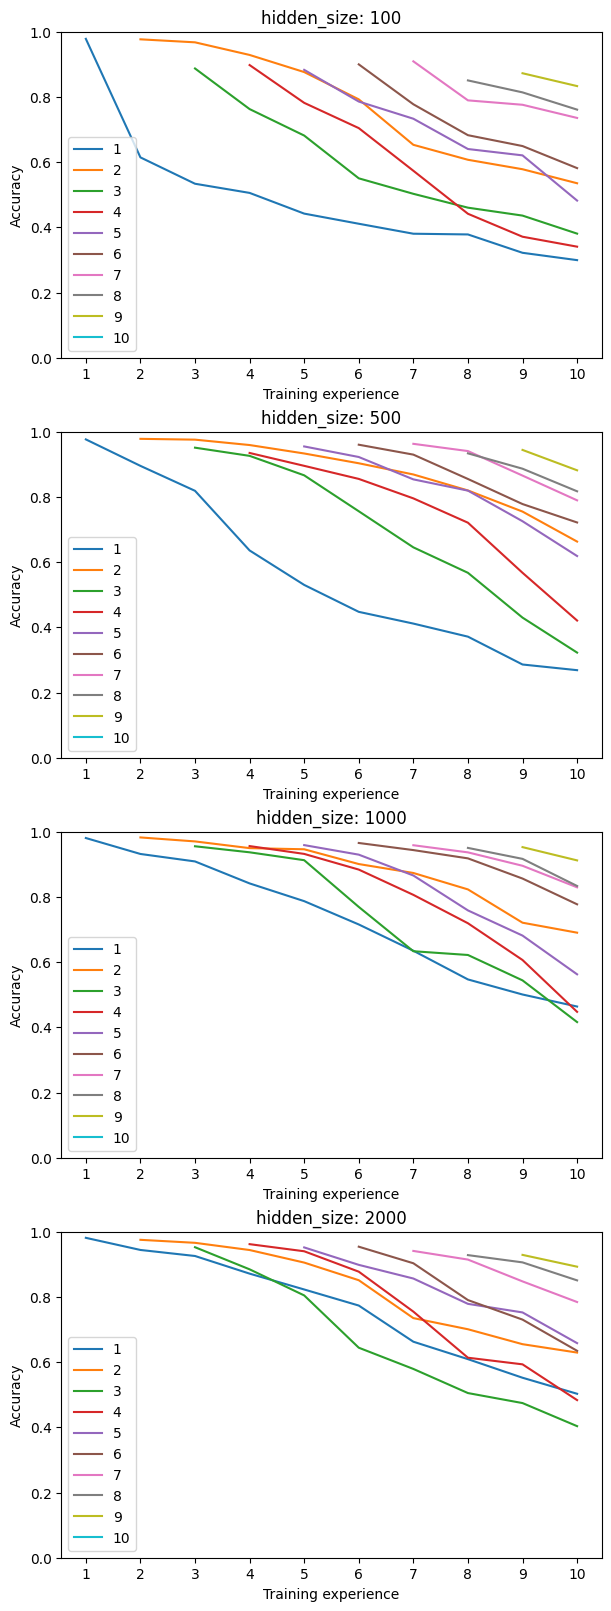

In [11]:
experiment = 'hidden_size'
plot_experiment(experiment)
plt.savefig(f'{folder}PLOTS/{experiment}.png')

### Weighting method

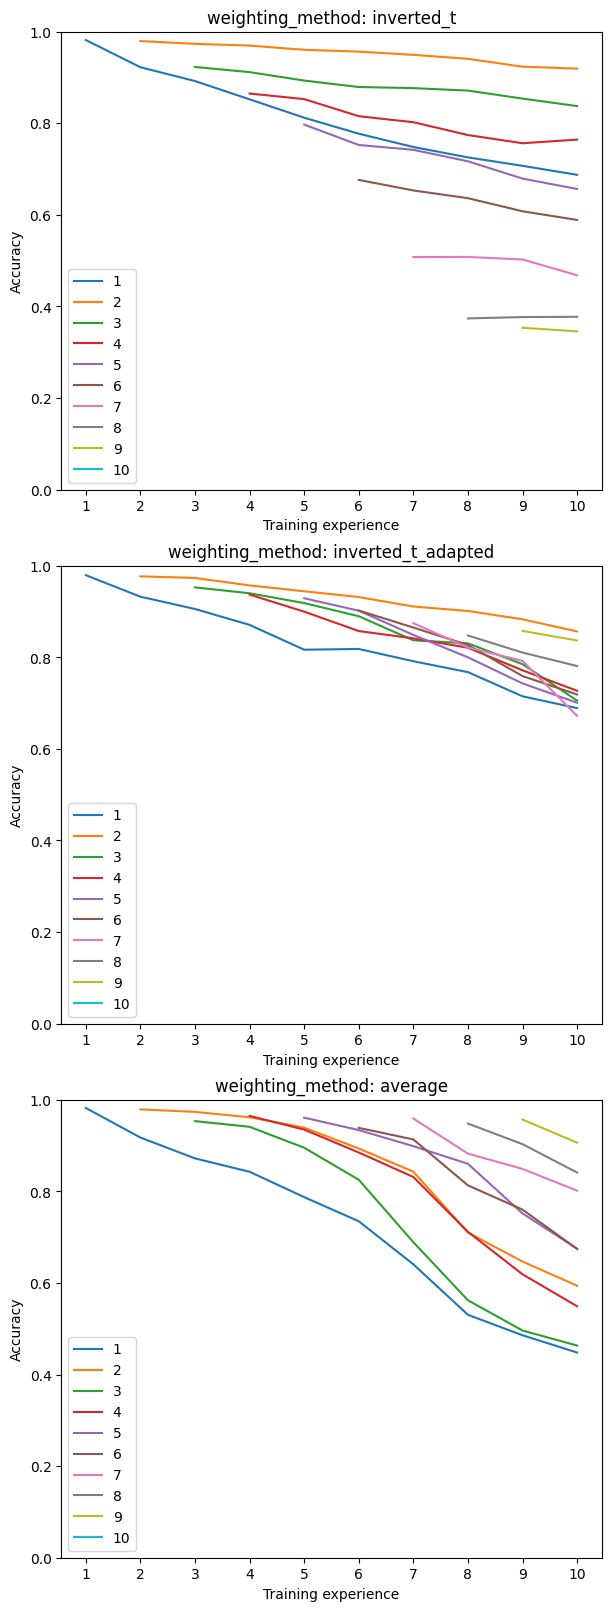

In [12]:
experiment = 'weighting_method'
plot_experiment(experiment)
plt.savefig(f'{folder}PLOTS/{experiment}.png')

### Learning rate

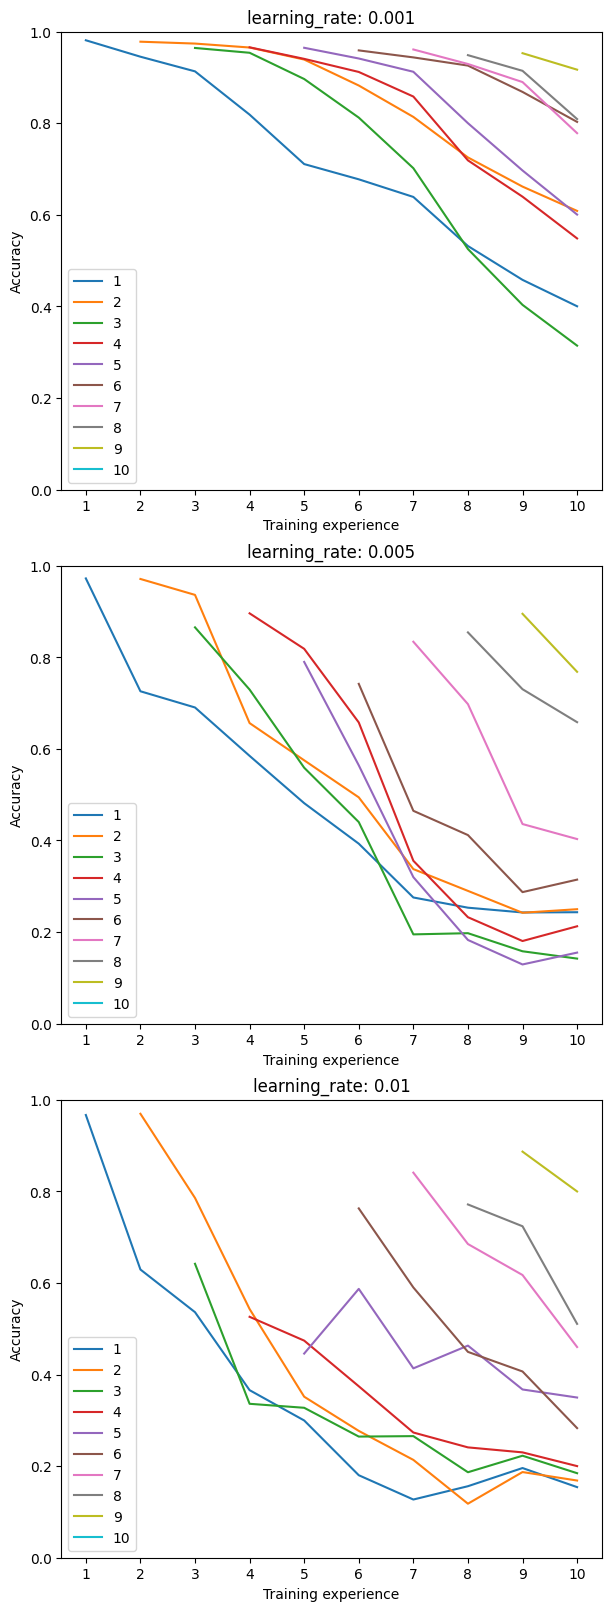

In [13]:
experiment = 'learning_rate'
plot_experiment(experiment)
plt.savefig(f'{folder}PLOTS/{experiment}.png')

### Experiences

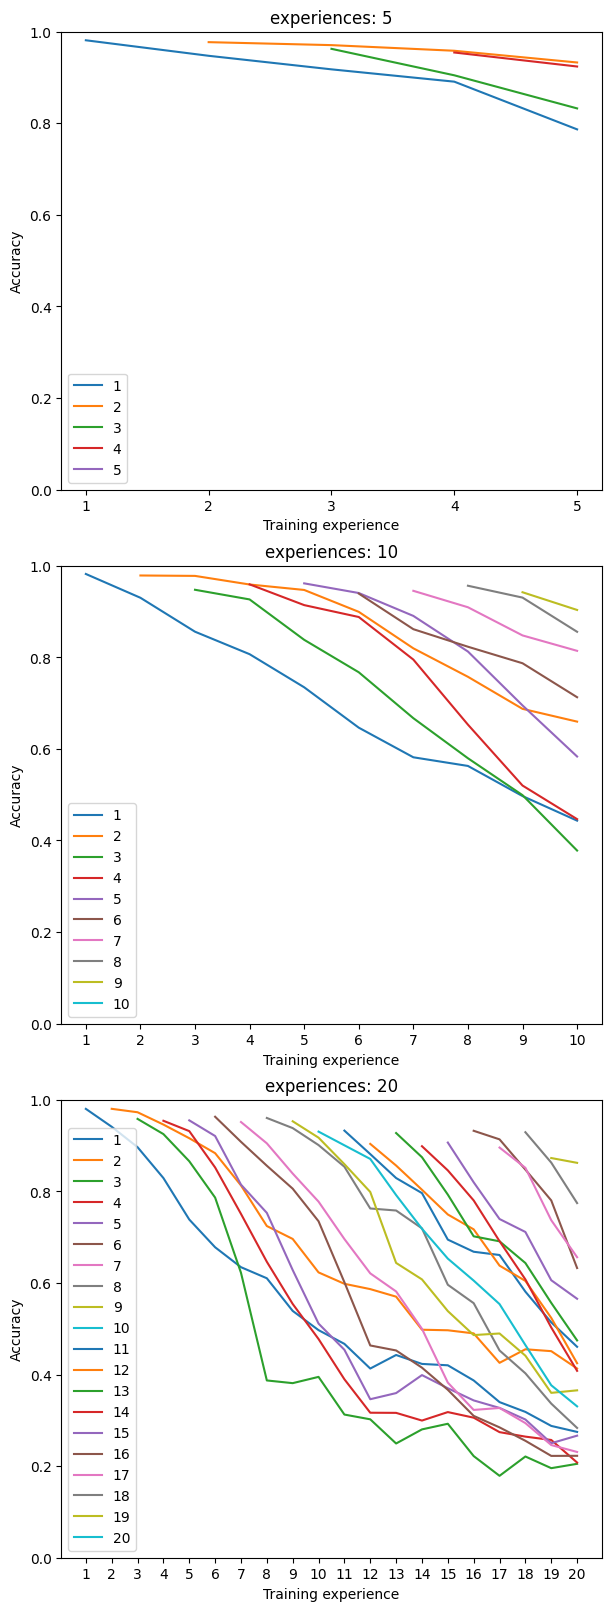

In [14]:
experiment = 'experiences'
plot_experiment(experiment)
plt.savefig(f'{folder}PLOTS/{experiment}.png')

### Epochs

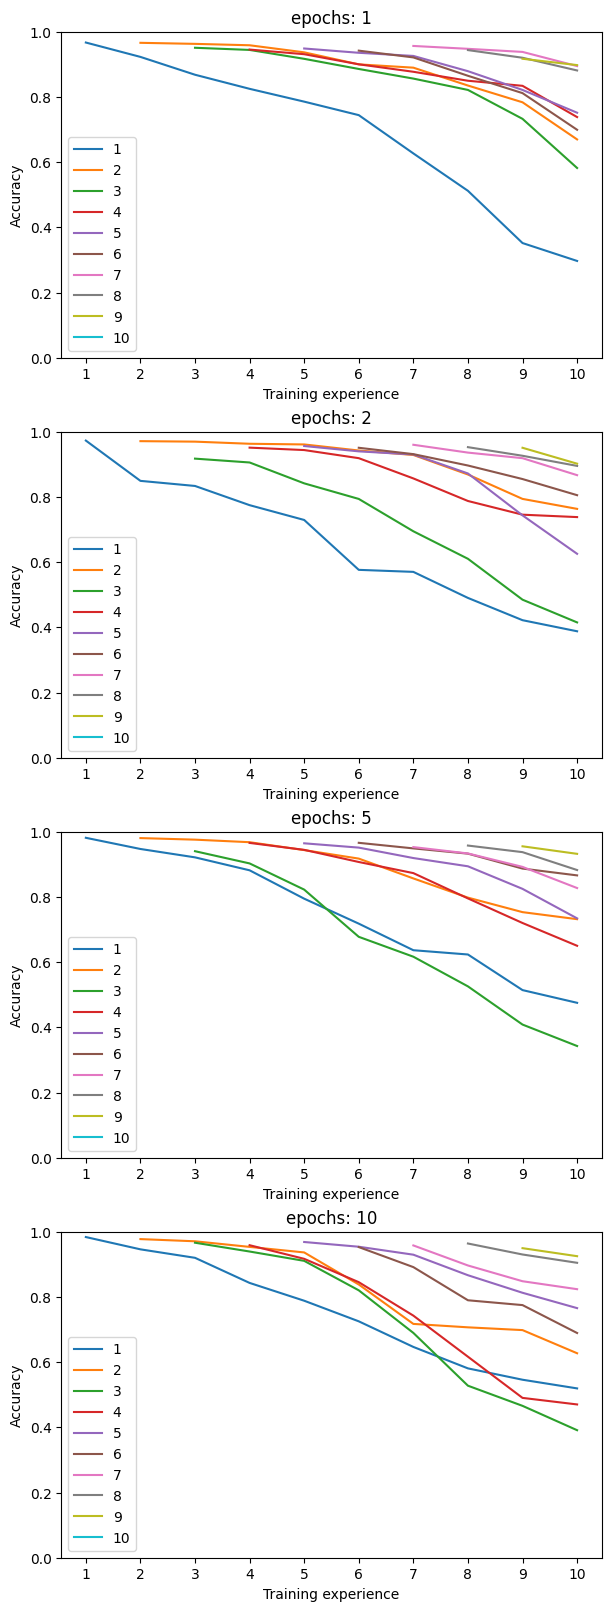

In [15]:
experiment = 'epochs'
plot_experiment(experiment)
plt.savefig(f'{folder}PLOTS/{experiment}.png')

### Hidden layers

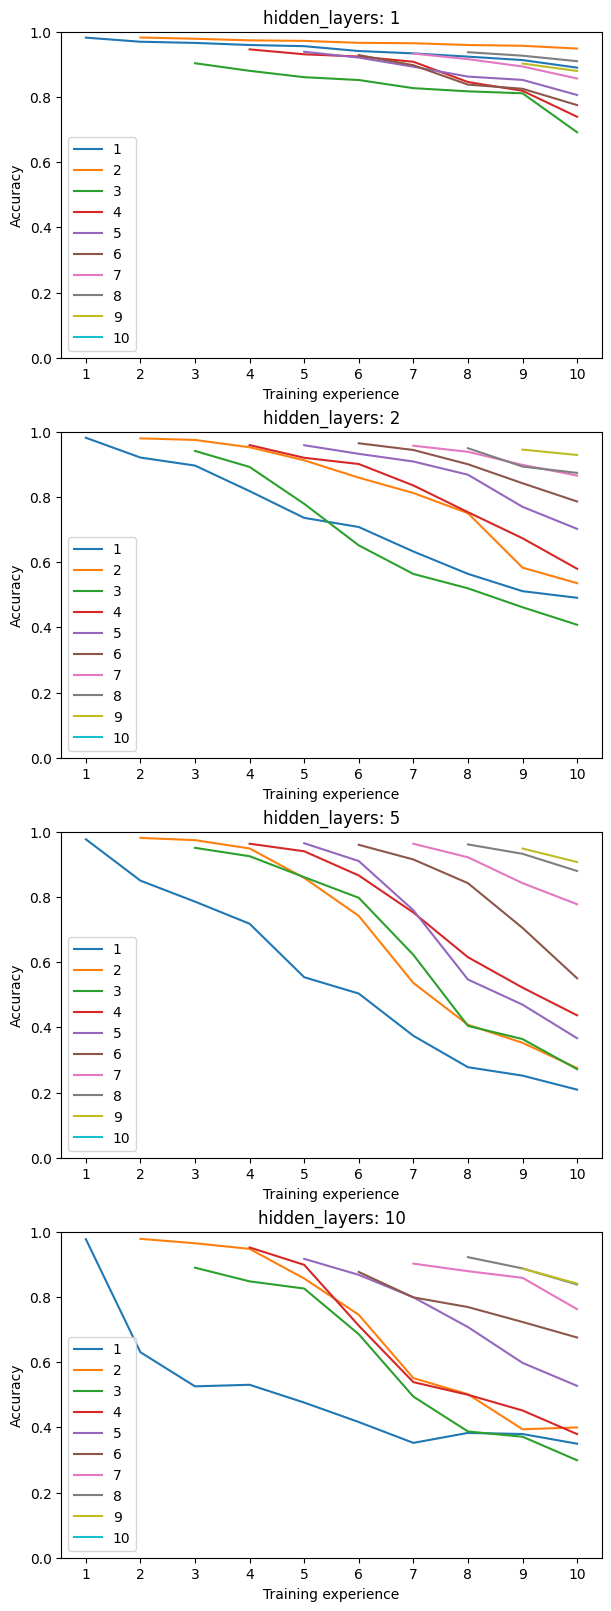

In [16]:
experiment = 'hidden_layers'
plot_experiment(experiment)
plt.savefig(f'{folder}PLOTS/{experiment}.png')